# Customer Segmentation : Clustering
### Customer Segmentation using KMeans Clustering Algorithm

##### Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

##### By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.

Details of Features are as below:

* Id: Unique identifier for each individual in the dataset.
* Year_Birth: The birth year of the individual.
* Education: The highest level of education attained by the individual.
* Marital_Status: The marital status of the individual.
* Income: The annual income of the individual.
* Kidhome: The number of young children in the household.
* Teenhome: The number of teenagers in the household.
* Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
* Recency: The number of days since the last purchase or interaction.
* MntWines: The amount spent on wines.
* MntFruits: The amount spent on fruits.
* MntMeatProducts: The amount spent on meat products.
* MntFishProducts: The amount spent on fish products.
* MntSweetProducts: The amount spent on sweet products.
* MntGoldProds: The amount spent on gold products.
* NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
* NumWebPurchases: The number of purchases made through the company's website.
* NumCatalogPurchases: The number of purchases made through catalogs.
* NumStorePurchases: The number of purchases made in physical stores.
* NumWebVisitsMonth: The number of visits to the company's website in a month.
* AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
* AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
* AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
* AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
* AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
* Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
* Z_CostContact: A constant cost associated with contacting a customer.
* Z_Revenue: A constant revenue associated with a successful campaign response.
* Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

### Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go
from plotly.subplots import make_subplots



sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.stats import zscore

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv


### Loading the dataset and overview

In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


* Some of the columns have a lot of zero values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* There are only 3 categprical columns

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* The income column has missing values

In [5]:
data.duplicated().sum()

0

* There are no duplicates

In [6]:
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


* Year of Birth (Year_Birth): Customers' birth years range from 1893 to 1996, with an average birth year of 1968.81 and a standard deviation of 11.98.

* Education: There are five education categories, with "Graduation" being the most common, represented by 1127 customers.

* Marital Status (Marital_Status): The most frequent marital status is "Married," comprising 864 of the 2240 customers.

* Income: Customer incomes range from 1730 to 666666, with an average income of 52247.25 and a standard deviation of 25173.08.

* Household Composition:

Kidhome: The average number of children at home is 0.44, with values ranging from 0 to 2.
Teenhome: The average number of teenagers at home is 0.51, with values ranging from 0 to 2.
    
* Recency (Days since last purchase): The recency of purchases varies from 0 to 99 days, with an average of 49.11 days and a standard deviation of 28.96.

* Monetary Amount Spent on Products:

Wines (MntWines): Customers spend an average of 303.94 on wines, with amounts ranging from 0 to 1493.
Fruits (MntFruits): Customers spend an average of 26.30 on fruits, with amounts ranging from 0 to 199.
Meat Products (MntMeatProducts): Customers spend an average of 166.95 on meat products, with amounts ranging from 0 to 1725.
Fish Products (MntFishProducts): Customers spend an average of 37.53 on fish products, with amounts ranging from 0 to 259.
Sweet Products (MntSweetProducts): Customers spend an average of 27.06 on sweet products, with amounts ranging from 0 to 263.
Gold Products (MntGoldProds): Customers spend an average of 44.02 on gold products, with amounts ranging from 0 to 362.
    
* Purchasing Channels:

NumDealsPurchases: Customers make an average of 2.33 deal purchases, with a range from 0 to 15.
NumWebPurchases: Customers make an average of 4.08 web purchases, with a range from 0 to 27.
NumCatalogPurchases: Customers make an average of 2.66 catalog purchases, with a range from 0 to 28.
NumStorePurchases: Customers make an average of 5.79 store purchases, with a range from 0 to 13.
    
* Campaign Responses and Complaints:

AcceptedCmp3: 7.28% of customers accepted the third campaign.
AcceptedCmp4: 7.46% of customers accepted the fourth campaign.
AcceptedCmp5: 7.28% of customers accepted the fifth campaign.
AcceptedCmp1: 6.43% of customers accepted the first campaign.
AcceptedCmp2: 1.34% of customers accepted the second campaign.
Complain: 0.94% of customers have filed a complaint.
Overall Response: 14.91% of customers responded to at least one campaign.

In [7]:
# Creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

#### Functions for quick visualization 

In [8]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined using Plotly

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    if bins is None:
        bins = 30  # Default number of bins

    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True, 
        row_heights=[0.25, 0.75],
        vertical_spacing=0.02,
        subplot_titles=(None, feature)
    )

    # Boxplot
    fig.add_trace(
        go.Box(
            x=data[feature], 
            boxmean=True, 
            marker_color='brown',
            name=feature
        ),
        row=1, col=1
    )

    # Histogram
    hist_data = data[feature].dropna()
    hist_vals, bin_edges = np.histogram(hist_data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    hist = go.Bar(
        x=bin_centers,
        y=hist_vals,
        marker_color='blue',
        opacity=0.7,
        name=feature
    )

    fig.add_trace(hist, row=2, col=1)

    # Add mean and median lines to the histogram
    mean_val = hist_data.mean()
    median_val = hist_data.median()
    fig.add_trace(
        go.Scatter(
            x=[mean_val, mean_val], 
            y=[0, hist_vals.max()],
            mode='lines',
            line=dict(color='green', dash='dash'),
            name='Mean'
        ),
        row=2, col=1
    )
    
    fig.add_trace(
        go.Scatter(
            x=[median_val, median_val], 
            y=[0, hist_vals.max()],
            mode='lines',
            line=dict(color='black'),
            name='Median'
        ),
        row=2, col=1
    )

    fig.update_layout(
        height=figsize[1] * 100,
        width=figsize[0] * 100,
        showlegend=True,
        xaxis_title=feature,
        yaxis_title='Count'
    )

    fig.show()
    
# Example usage:
# df = pd.DataFrame({'Price Change': [random data]})  # Replace with your actual data
# histogram_boxplot(df, "Price Change")

In [9]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top using Plotly

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    value_counts = data[feature].value_counts()
    
    if n is not None:
        value_counts = value_counts.head(n)

    # Get unique colors for each category
    unique_categories = value_counts.index
    
    # Define a list of colors or use a Plotly color scale
    colors = px.colors.qualitative.Pastel  # Example: Using a predefined qualitative color scale

    # Ensure enough colors for the categories
    if len(colors) < len(unique_categories):
        raise ValueError("Not enough colors in the palette for the number of categories.")

    color_map = {category: colors[i % len(colors)] for i, category in enumerate(unique_categories)}

    # Create bar plot
    fig = go.Figure()
    fig.add_trace(
        go.Bar(
            x=value_counts.index,
            y=value_counts.values,
            text=[f"{100 * val / total:.1f}%" if perc else str(val) for val in value_counts.values],
            textposition='outside',
            marker=dict(color=[color_map[category] for category in value_counts.index])  # Assign colors based on category
        )
    )

    # Update layout
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title='Percentage' if perc else 'Count',
        xaxis_tickangle=-90,
        showlegend=False,
        height=600,
        width=(n + 2) * 100 if n else (value_counts.nunique() + 2) * 100
    )

    fig.show()

# Example usage:
# df = pd.DataFrame({'Education': ['Graduation', 'PhD', 'Graduation', 'Master', 'PhD', 'Graduation', 'Basic', '2n Cycle']})  # Replace with your actual data
# labeled_barplot(df, "Education", perc=True)

In [10]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    fig = go.Figure()
    for col in tab.columns:
        fig.add_trace(go.Bar(
            x=tab.index,
            y=tab[col],
            name=col
        ))

    fig.update_layout(
        barmode='stack',
        xaxis_title=predictor,
        yaxis_title='Proportion',
        title=f'Stacked Bar Chart of {predictor} vs {target}',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    fig.show()

# Example usage:
# stacked_barplot(df, "education_of_employee", "case_status")

In [11]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(20, 8))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [12]:
labeled_barplot(df, "Education", perc=True)

* Master and 2n Cyde waill be mapped as they are hte same thing and seems the bachelors are 50.3% 

In [13]:
labeled_barplot(df, "Marital_Status", perc=True)

* Married custumers are the most common and Single, YOLO and Alone will be mapped as they are all hte same thing

In [14]:
labeled_barplot(df, "Dt_Customer", perc=True, n=10) 

* The mode of the people who become customers is in year 2014

In [15]:
histogram_boxplot(df, "Income")

* The highest count of income is a bit more than 700 custpmers of 50k

In [16]:
histogram_boxplot(df, "Kidhome")

* Most customers have zero or one kids and only few have two

In [17]:
histogram_boxplot(df, "Teenhome")

* Similar situation as the Kidhome column

In [18]:
histogram_boxplot(df, "Year_Birth")

* The highest count of custumers are bonr during the 70's

In [19]:
histogram_boxplot(df, "Recency")

* Looks like uniform distribution between the last purchace of the customers

In [20]:
histogram_boxplot(df, "MntWines")
histogram_boxplot(df, "MntFruits")
histogram_boxplot(df, "MntMeatProducts")
histogram_boxplot(df, "MntFishProducts")
histogram_boxplot(df, "MntSweetProducts")
histogram_boxplot(df, "MntGoldProds")

* Looks like the custumers are not interested in big quantities on food products and tha's understandabe as most have from zero to one children.

In [21]:
histogram_boxplot(df, "NumDealsPurchases")
histogram_boxplot(df, "NumWebPurchases")
histogram_boxplot(df, "NumCatalogPurchases")
histogram_boxplot(df, "NumStorePurchases")
histogram_boxplot(df, "NumWebVisitsMonth")

* Deal and catalog purchases are the most popular and the customers usualy visit the website from one to ten times a month

In [22]:
histogram_boxplot(df, "AcceptedCmp3")
histogram_boxplot(df, "AcceptedCmp4")
histogram_boxplot(df, "AcceptedCmp5")
histogram_boxplot(df, "AcceptedCmp1")
histogram_boxplot(df, "AcceptedCmp2")

* Only few customers get accepted for a campain

In [23]:
histogram_boxplot(df, "Z_CostContact")
histogram_boxplot(df, "Z_Revenue")
histogram_boxplot(df, "Response")
histogram_boxplot(df, "Complain")

* The customers weren't interested in the campains in general

### Bivariate Analysis

In [24]:
stacked_barplot(df, "Marital_Status", "Education")

Education       2n Cycle  Basic  Graduation  Master  PhD   All
Marital_Status                                                
All                  203     54        1127     370  486  2240
Married               81     20         433     138  192   864
Single                37     18         252      75   98   480
Together              57     14         286     106  117   580
Divorced              23      1         119      37   52   232
Widow                  5      1          35      12   24    77
Absurd                 0      0           1       1    0     2
Alone                  0      0           1       1    1     3
YOLO                   0      0           0       0    2     2
------------------------------------------------------------------------------------------------------------------------


* 1/4 of the customers are married or divorced bachelors

In [25]:
stacked_barplot(df, "Complain", "Marital_Status")

Marital_Status  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Complain                                                                    
0                    2      3       230      856     474       575     77   
All                  2      3       232      864     480       580     77   
1                    0      0         2        8       6         5      0   

Marital_Status  YOLO   All  
Complain                    
0                  2  2219  
All                2  2240  
1                  0    21  
------------------------------------------------------------------------------------------------------------------------


* Only few complains from every status exept for the widow

In [26]:
stacked_barplot(df, "Complain", "Education")

Education  2n Cycle  Basic  Graduation  Master  PhD   All
Complain                                                 
0               199     54        1113     368  485  2219
All             203     54        1127     370  486  2240
1                 4      0          14       2    1    21
------------------------------------------------------------------------------------------------------------------------


* The bachelors complained the most

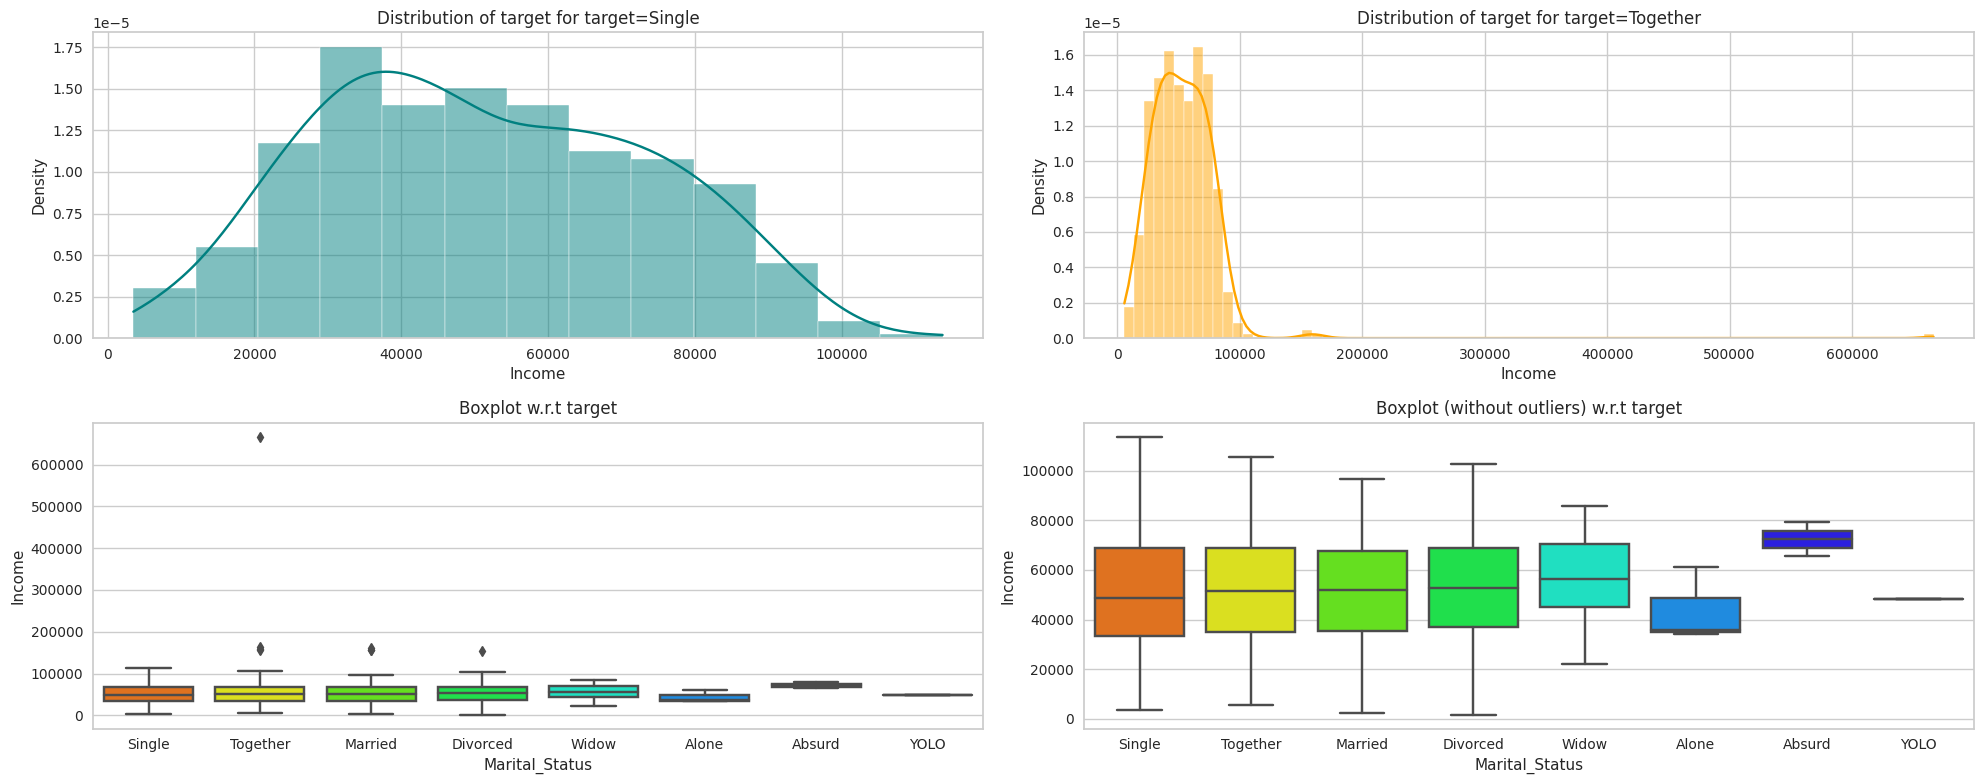

In [27]:
distribution_plot_wrt_target(df, "Income", "Marital_Status")

* The singles have the least income

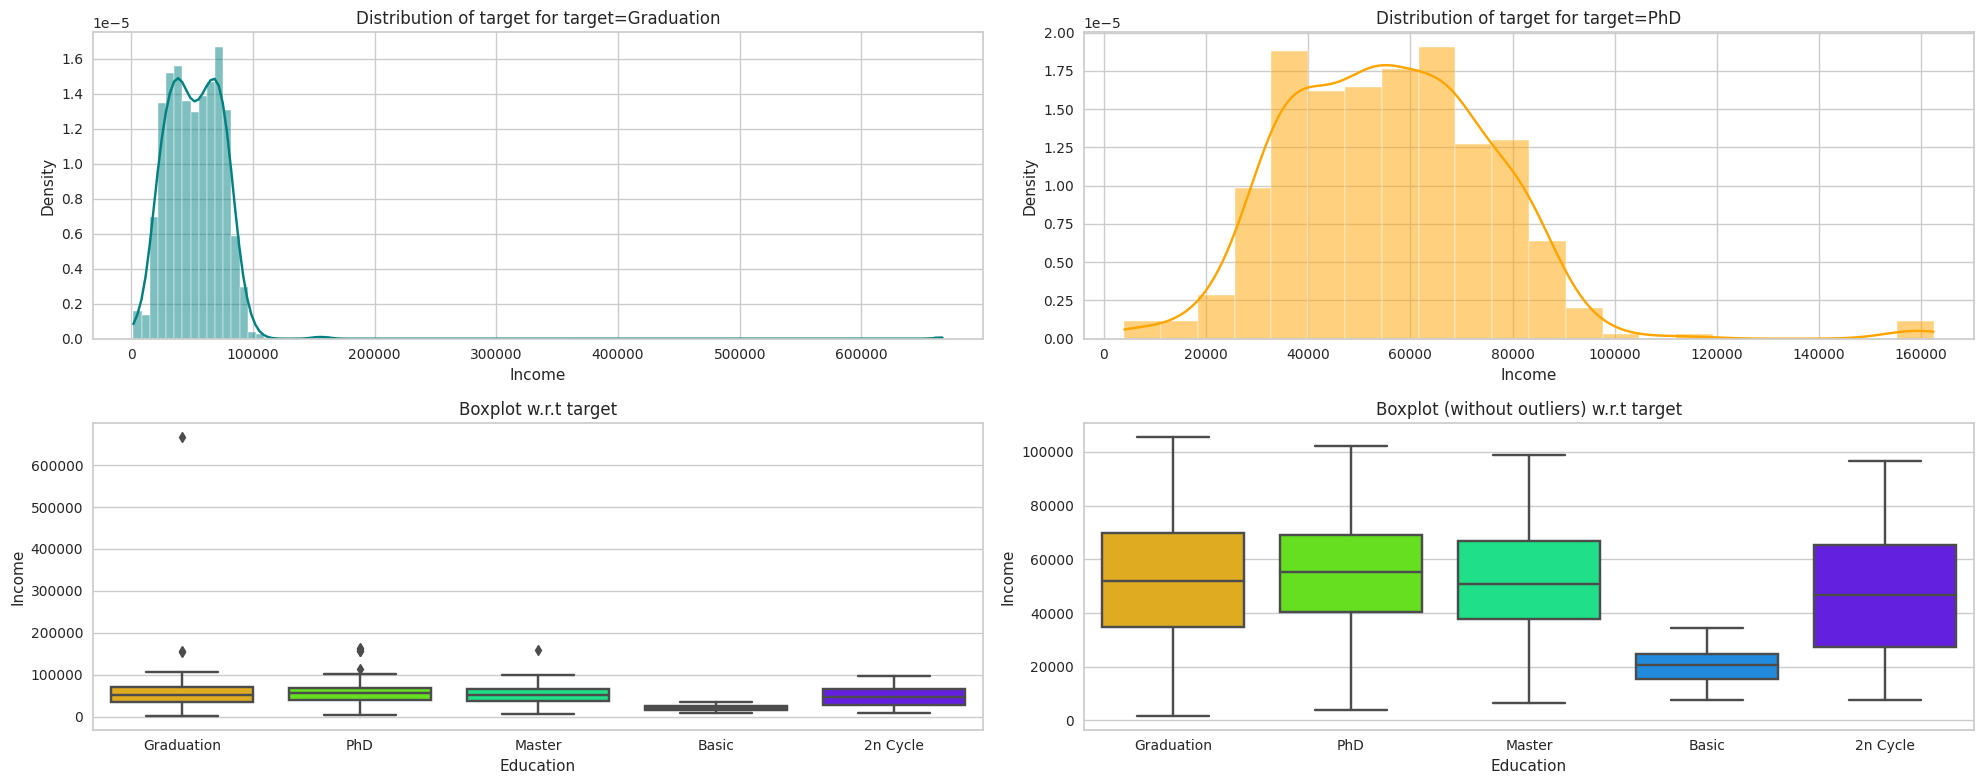

In [28]:
distribution_plot_wrt_target(df, "Income", "Education")

* Also the ones with basic education have the least income

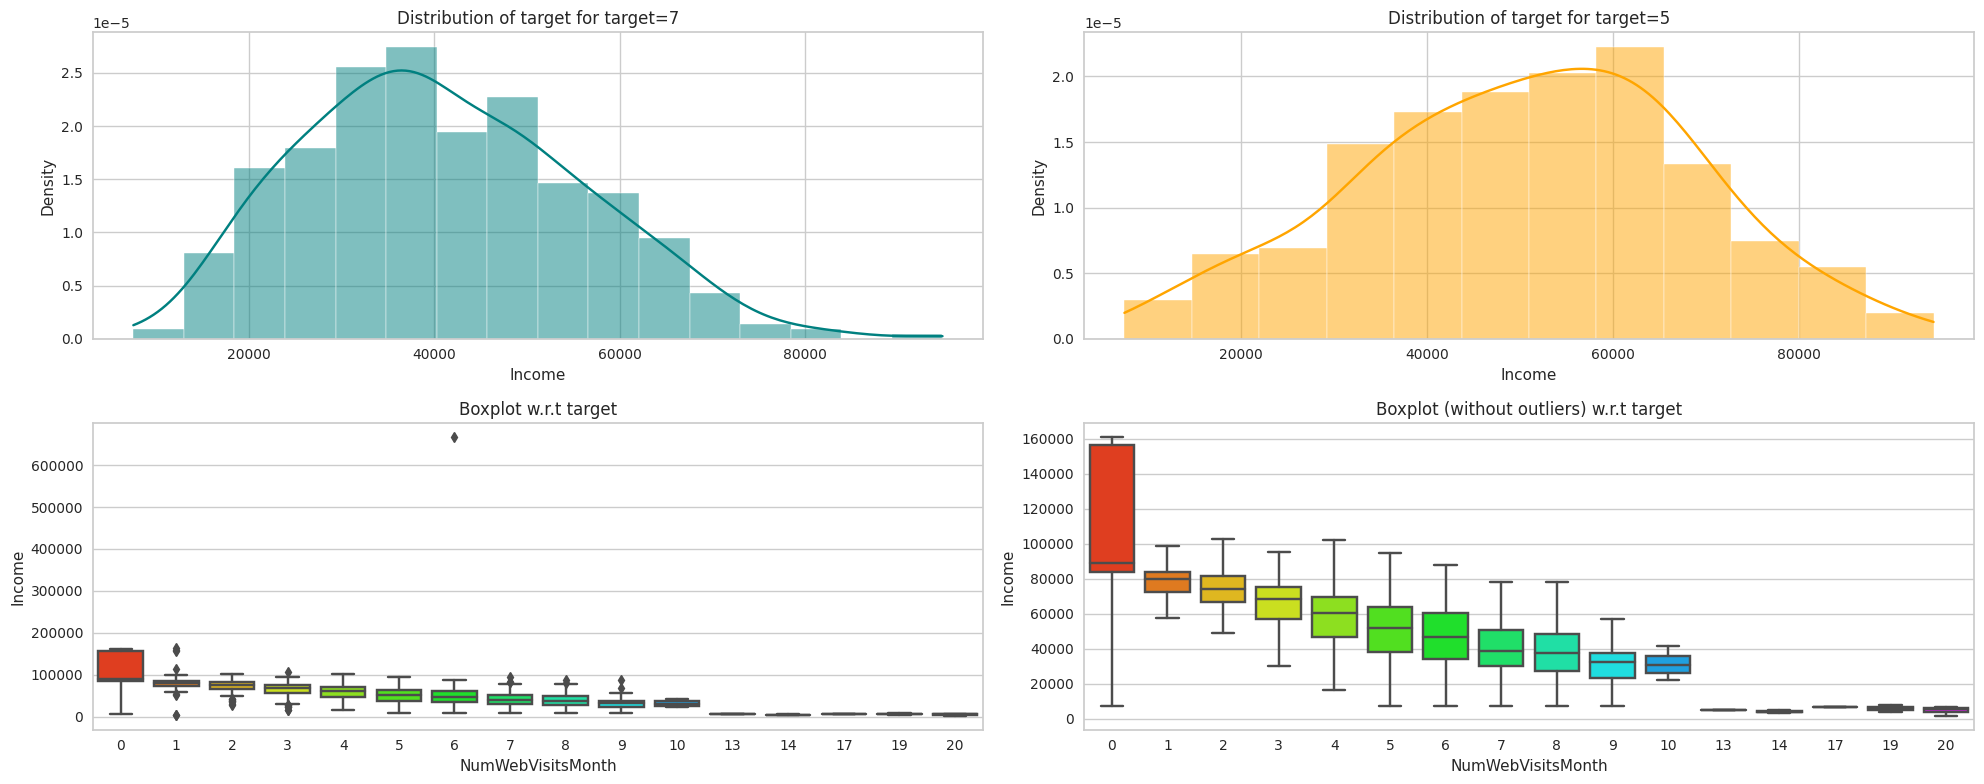

In [29]:
distribution_plot_wrt_target(df, "Income", "NumWebVisitsMonth")

* A lot of people didn't vist the website evey month or they visited it only ones

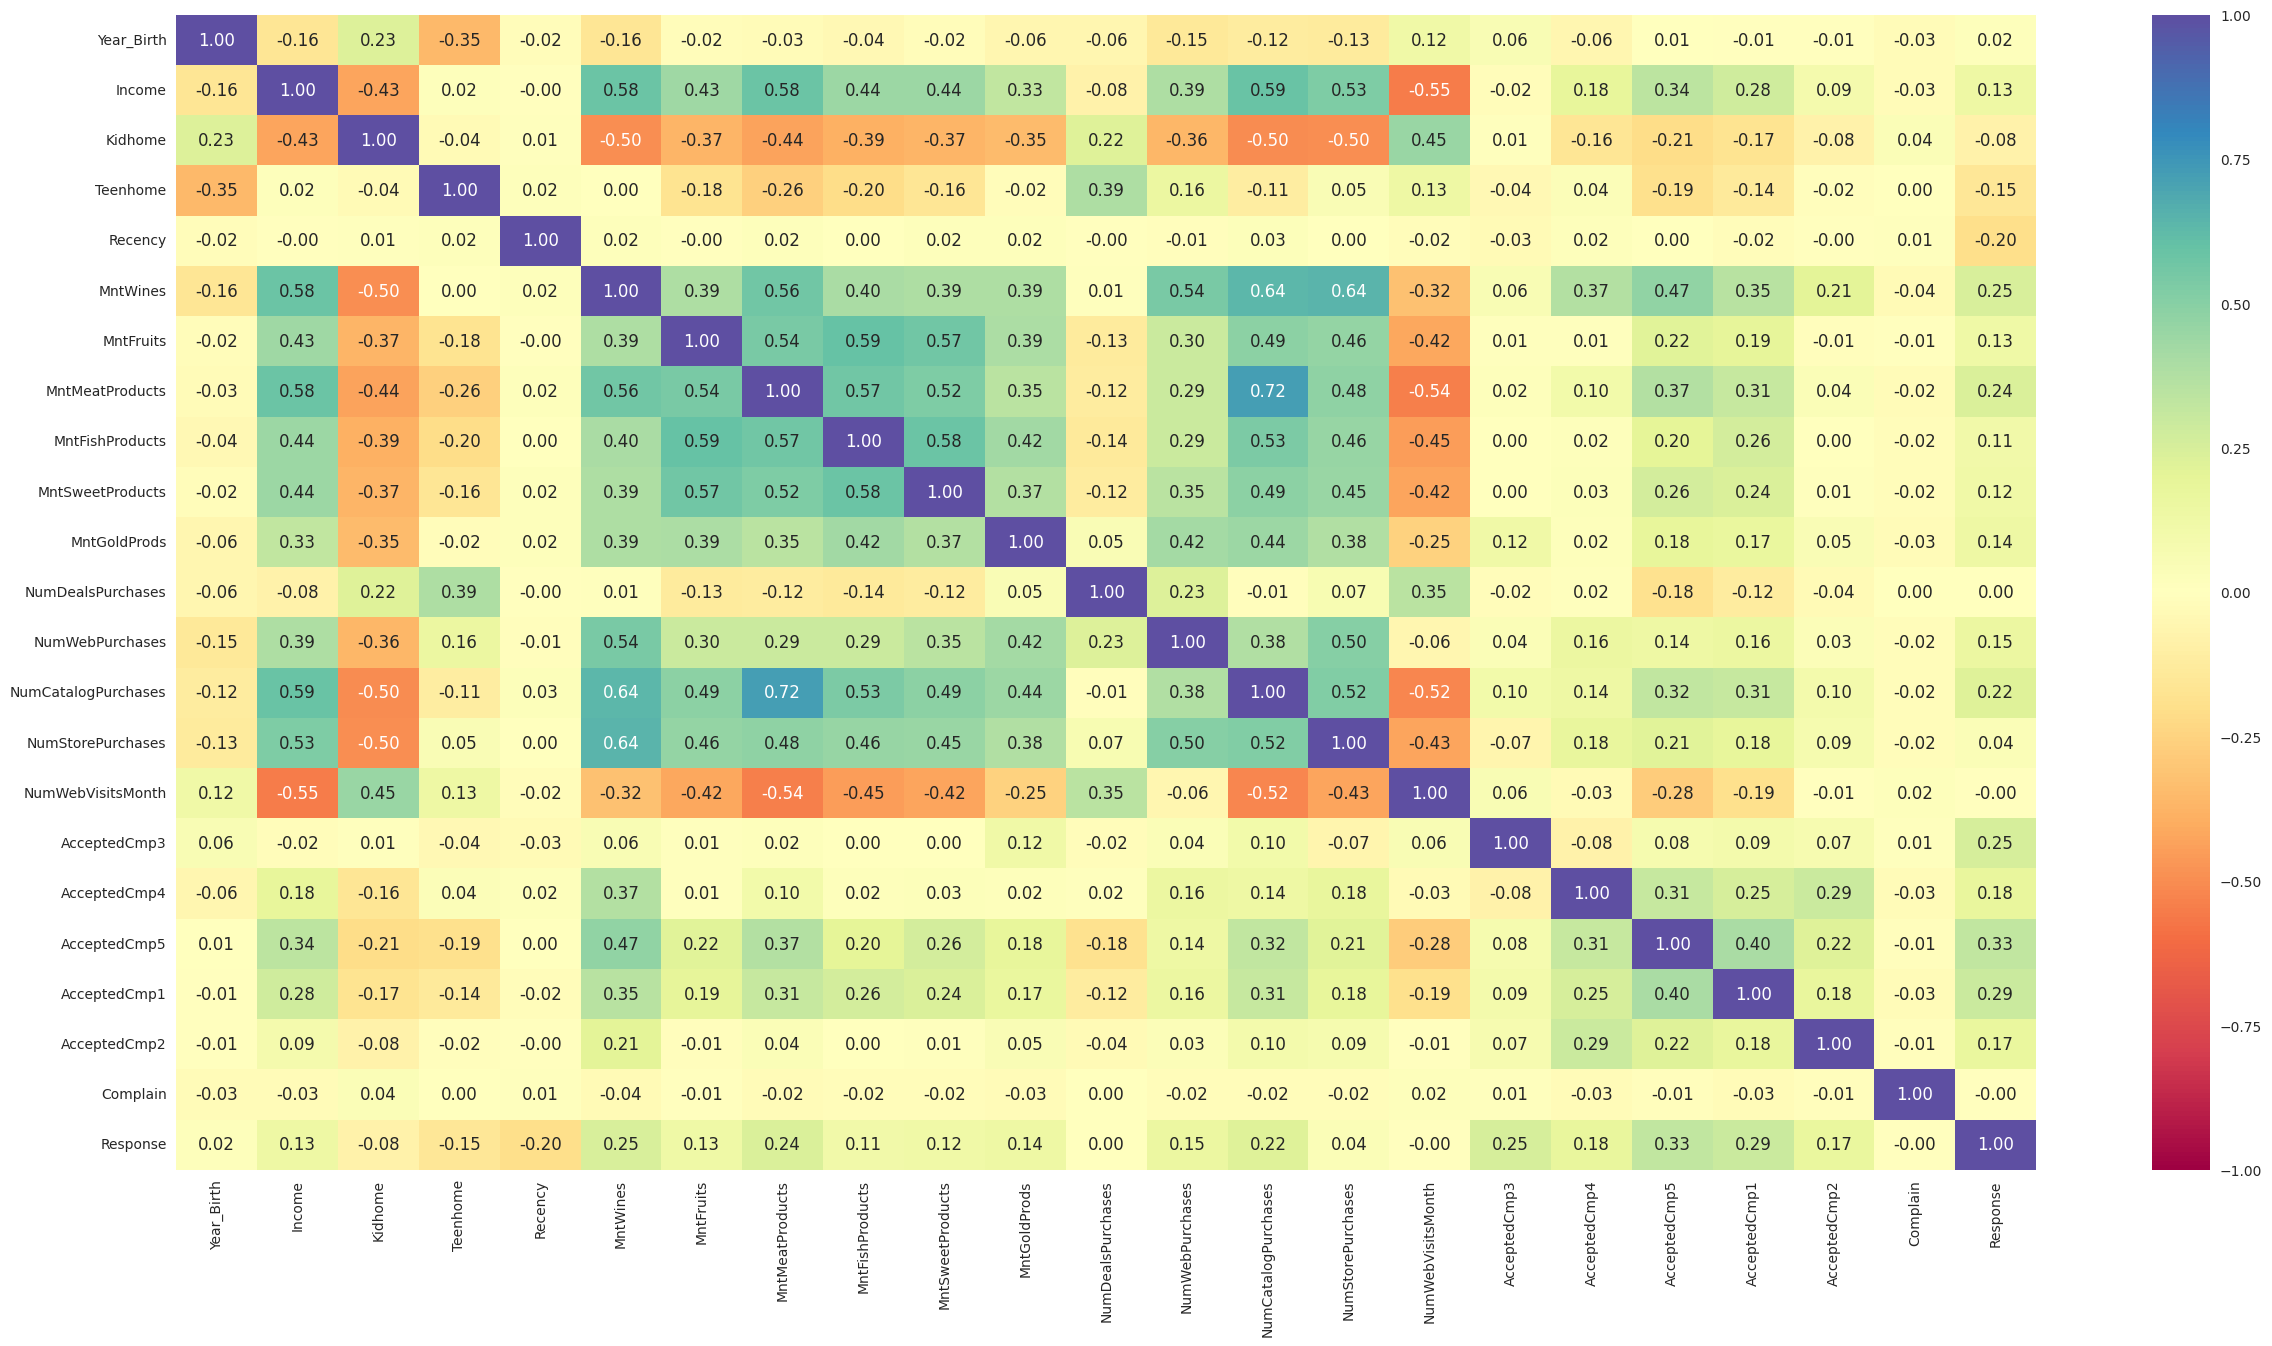

In [30]:
numeric_df = df.select_dtypes(include='number').drop(columns=['Z_Revenue', 'Z_CostContact', 'ID'])

# Set the figure size
plt.figure(figsize=(30, 15))

# Create heatmap
sns.heatmap(
    numeric_df.corr(),  # Compute correlation matrix
    annot=True,         # Annotate each cell with the numeric value
    vmin=-1, vmax=1,    # Set the range of values for colormap
    fmt=".2f",          # Format for annotations
    cmap="Spectral"     # Colormap to use
)

# Display the plot
plt.show()

Here are the top 10 insights from the correlation matrix:

* Income shows strong positive correlations with various purchase categories, particularly MntWines (0.58), MntCatalogPurchases (0.59), and NumStorePurchases (0.53).
* Kidhome has notable negative correlations with income (-0.43) and purchase amounts across categories, suggesting households with children spend less.
* MntMeatProducts has the strongest correlation with NumCatalogPurchases (0.72), indicating meat products are popular catalog items.
* Age (Year_Birth) has weak to moderate negative correlations with most purchase categories, implying younger customers tend to spend more.
* The various purchase amount categories (MntWines, MntFruits, MntMeatProducts, etc.) are generally positively correlated with each other, indicating customers who spend more in one category tend to spend more in others.
* NumWebVisitsMonth shows negative correlations with purchase amounts, suggesting frequent website visitors may not necessarily be big spenders.
* AcceptedCmp5 (marketing campaign 5) has the strongest positive correlations with purchase amounts compared to other campaigns, implying it may have been the most effective.
* Teenhome shows weak correlations with most variables, suggesting the presence of teenagers has less impact on purchasing behavior than younger children.
* The "Response" variable (likely indicating response to a specific campaign) shows moderate positive correlations with AcceptedCmp3, AcceptedCmp4, and AcceptedCmp5.
* The "Complain" variable has very weak correlations with most other variables, indicating customer complaints may not strongly relate to other measured factors.

## Data Preprocessing

### Outlier Check (numerical columns)

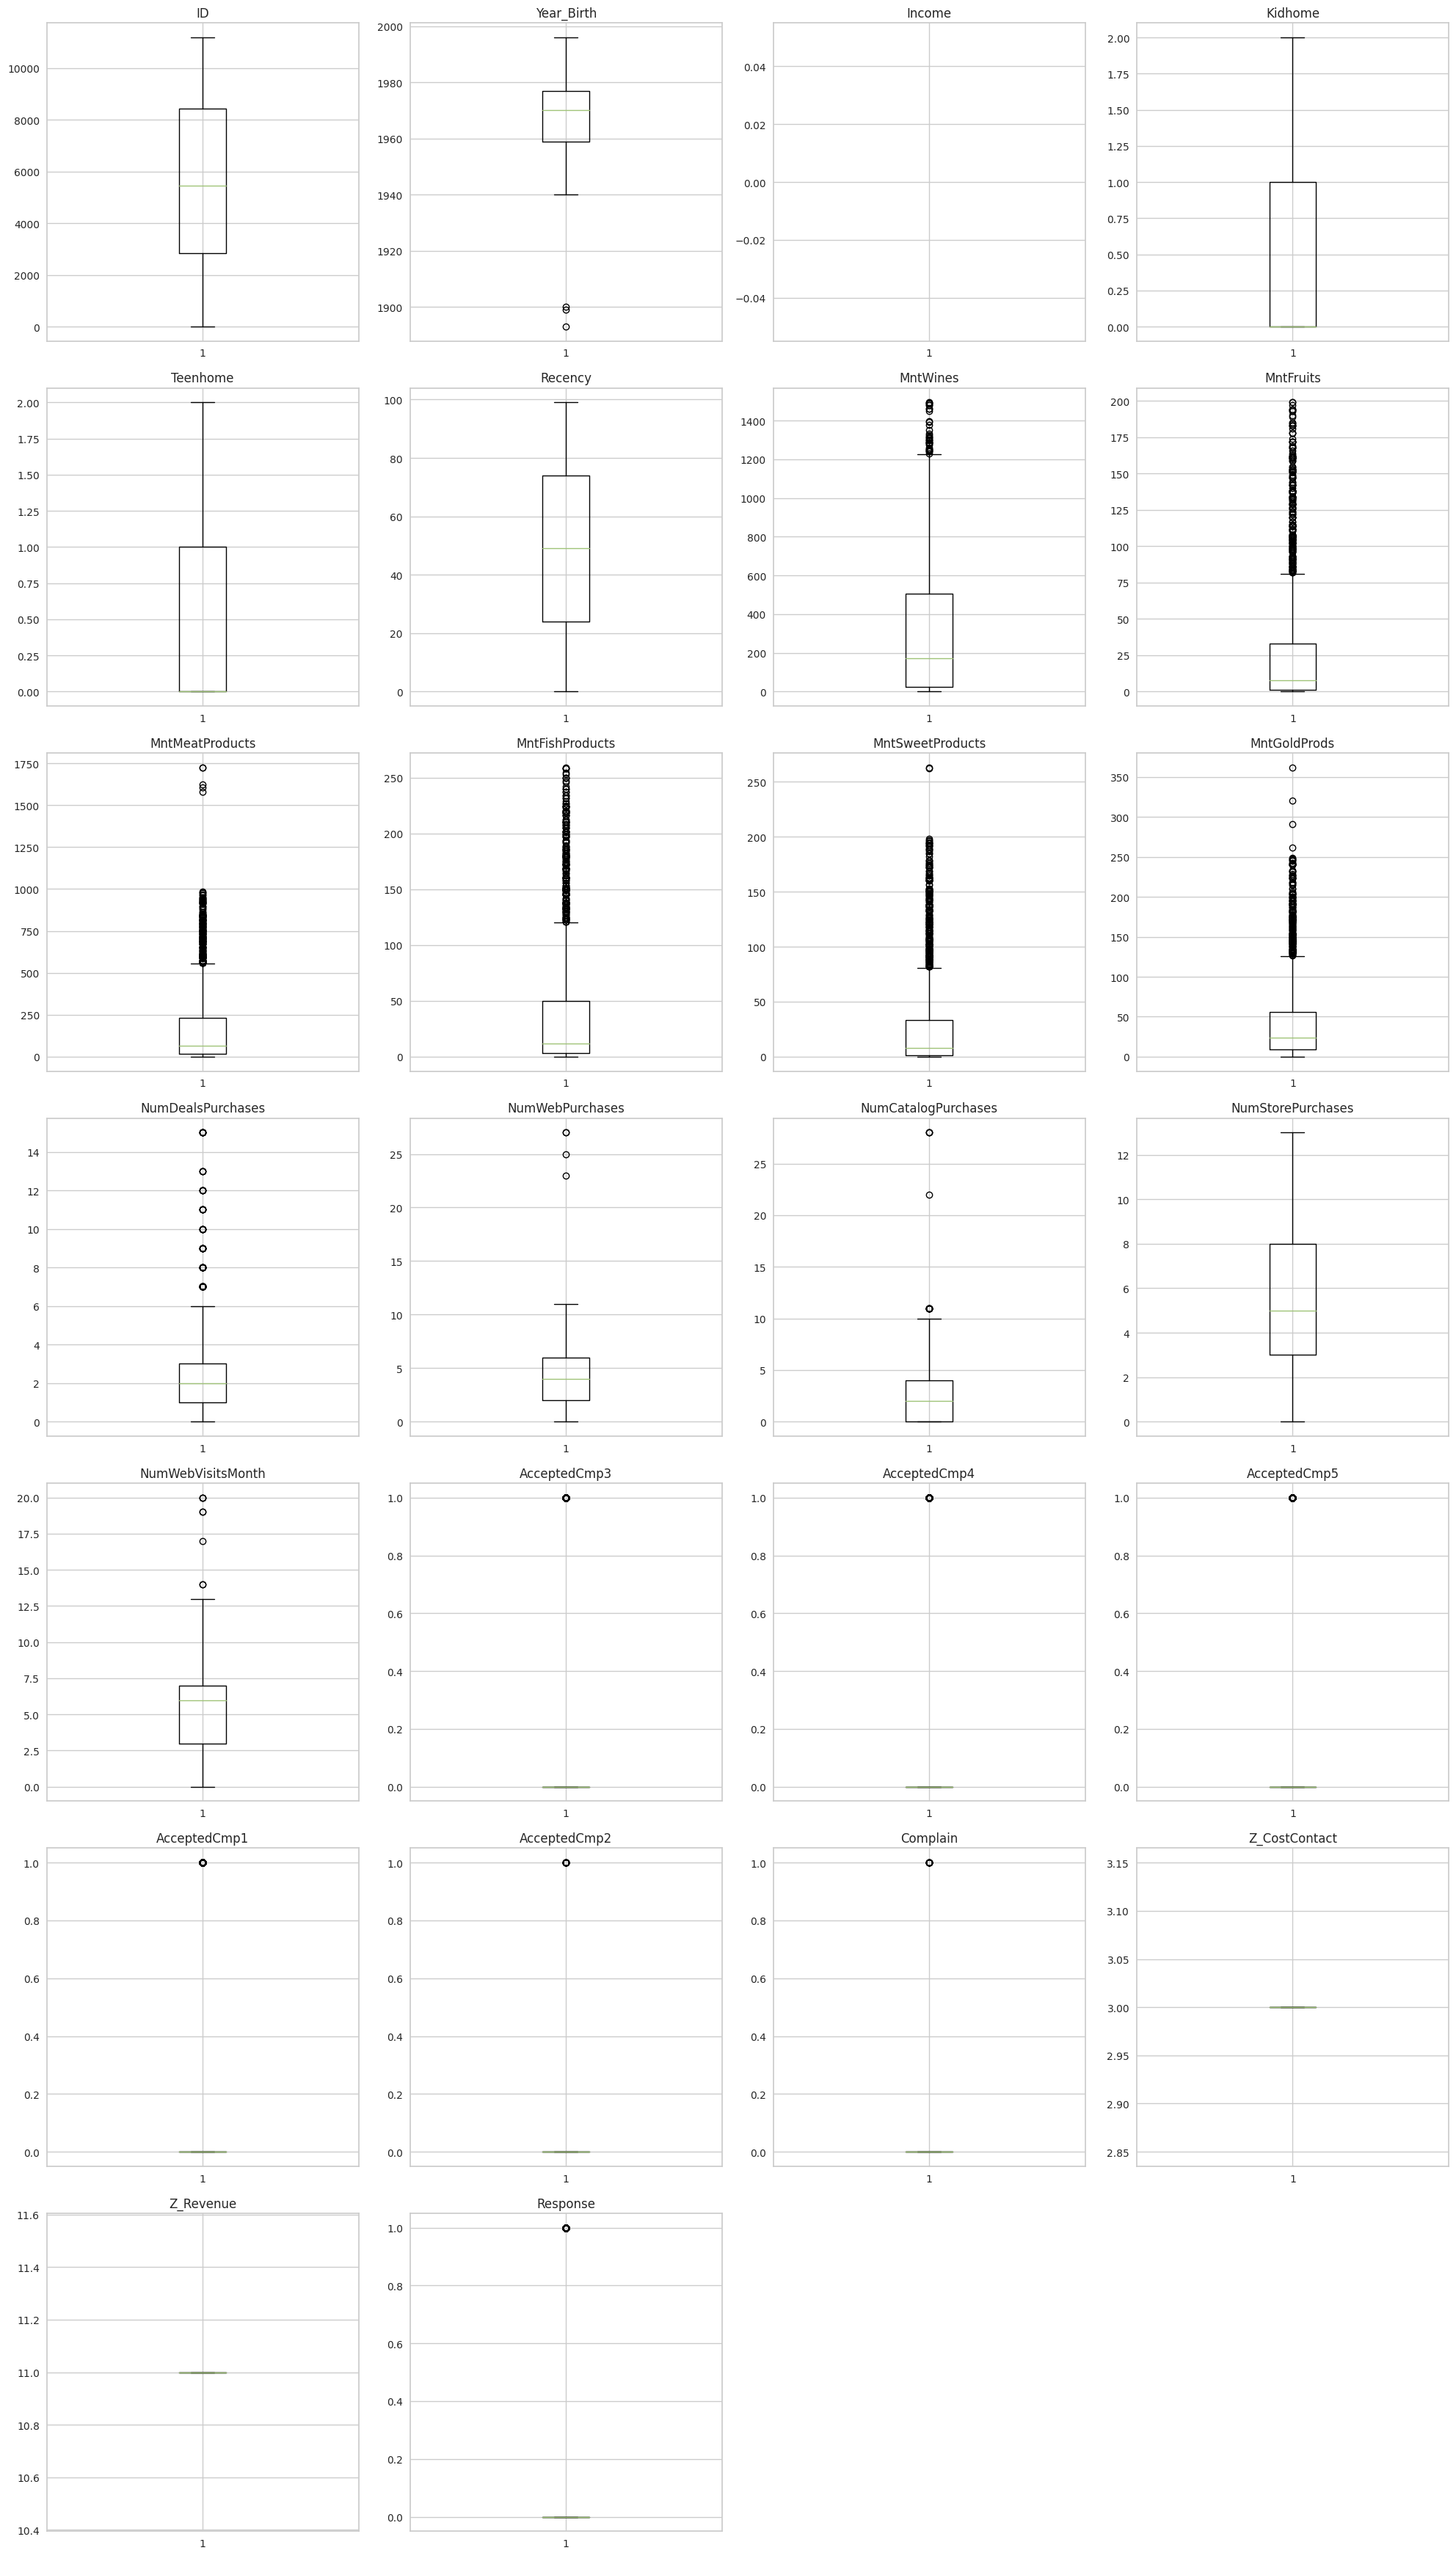

In [31]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Calculate number of rows and columns for subplots
num_cols = 4
num_rows = (len(numeric_columns) - 1) // num_cols + 1  # Calculate number of rows needed

# Adjust figure size based on the number of subplots
fig_width = 5 * num_cols  # Adjust width based on number of columns
fig_height = 5 * num_rows  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot indices dynamically
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

In [32]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [33]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numeric_columns)

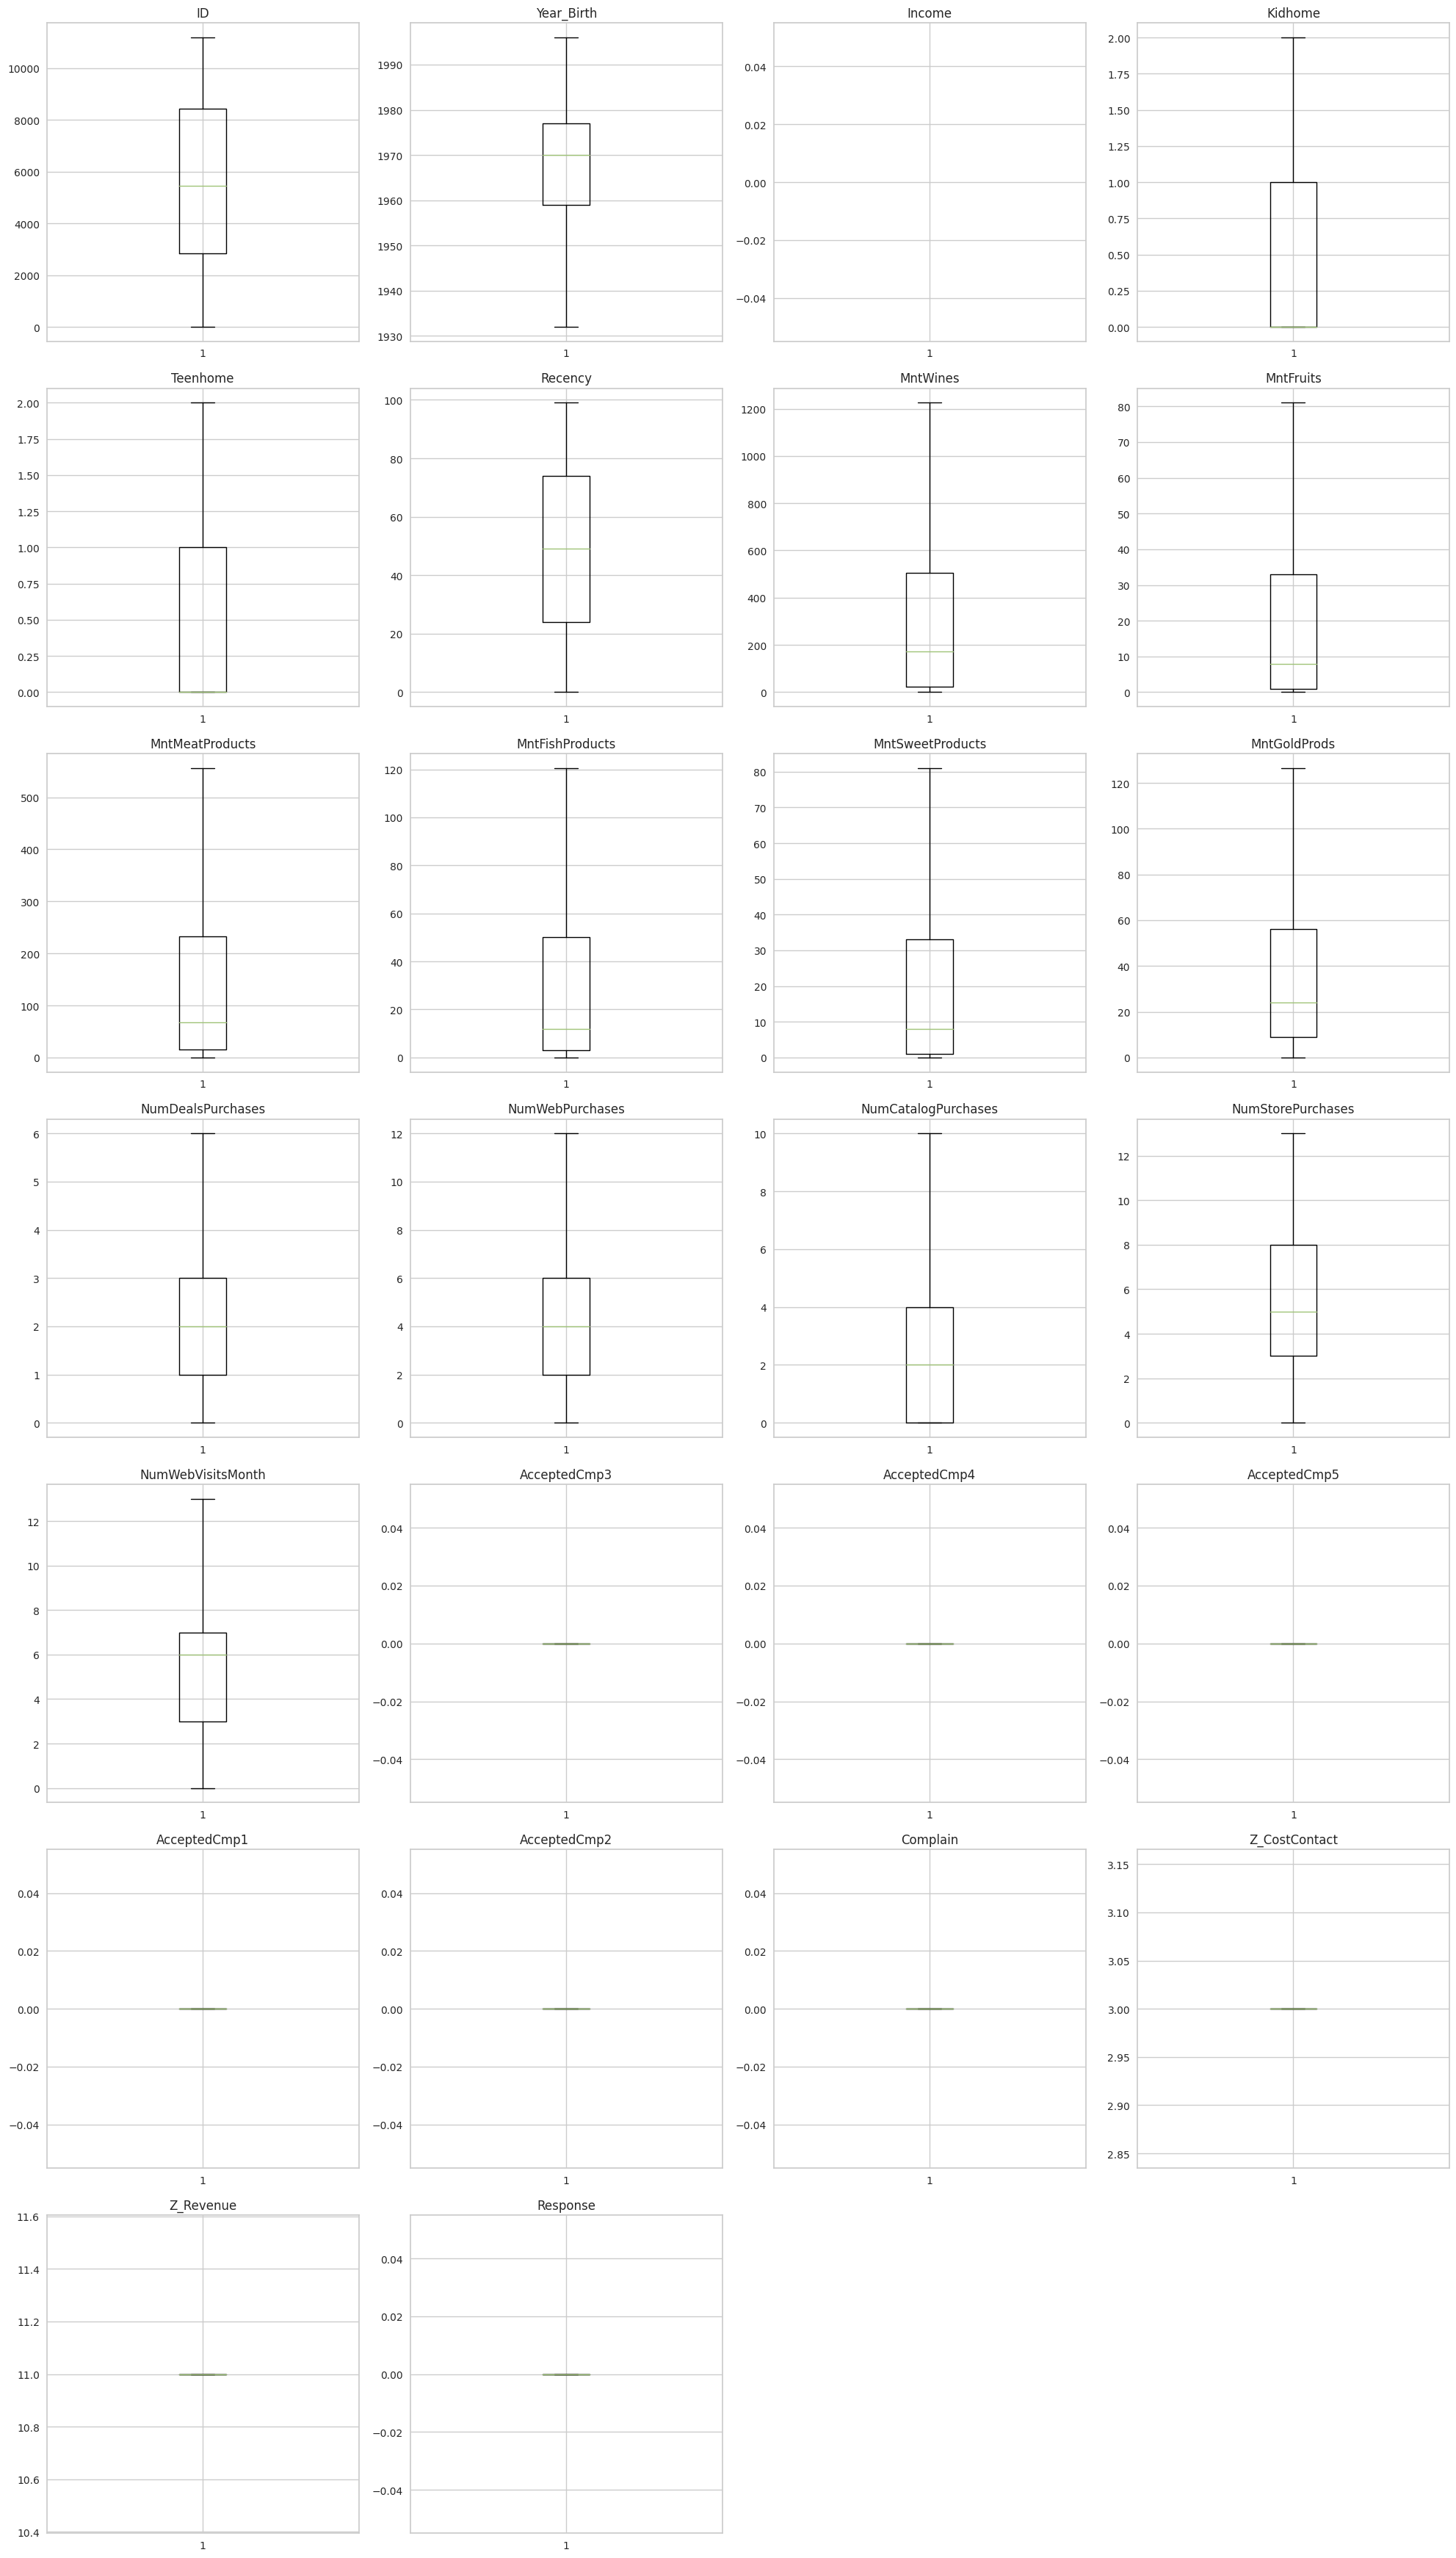

In [34]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Calculate number of rows and columns for subplots
num_cols = 4
num_rows = (len(numeric_columns) - 1) // num_cols + 1  # Calculate number of rows needed

# Adjust figure size based on the number of subplots
fig_width = 5 * num_cols  # Adjust width based on number of columns
fig_height = 5 * num_rows  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot indices dynamically
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

* Outliers needed to be removed because i am going to use the Euclidean distance

## Feature Engineering

In [35]:
# Mapping of Education to standardized categories
education_mapping = {
    'Graduation': 'Bachelor',
    'PhD': 'Doctor',
    'Master': 'Master',
    '2n Cyde': 'Master',  # Combine with Master
    'Basic': 'Basic'
}

# Apply the mapping
df['Education'] = df['Education'].map(education_mapping)

# Calculate the mode of the 'Education' column
mode_value = df['Education'].mode()[0]
print(f"Mode of 'Education' column: {mode_value}")

# Replace missing values with the mode
df['Education'].fillna(mode_value, inplace=True)

Mode of 'Education' column: Bachelor


In [36]:
# Mapping of Marital_Status to combined categories
status_mapping = {
    'Married': 'Married',
    'Together': 'Together',
    'Single': 'Single',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'Alone': 'Single',  # Combine with Single
    'YOLO': 'Single',   # Combine with Single
    'Absurd': 'Other'   # Handle 'Absurd' by mapping it to 'Other' or remove it
}

# Apply the mapping
df['Marital_Status'] = df['Marital_Status'].map(status_mapping)

In [37]:
# Create a new feature by combining Education and Marital_Status
df['Education&MaritalStatus'] = df['Education'] + '_' + df['Marital_Status']

In [38]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Education column
df['Education_MaritalStatus'] = label_encoder.fit_transform(df['Education&MaritalStatus'])

# Create a dictionary to map encoded values to original values
education_maritalstatus_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Education and Marital_Status Mapping:")
print(education_maritalstatus_mapping)

Education and Marital_Status Mapping:
{'Bachelor_Divorced': 0, 'Bachelor_Married': 1, 'Bachelor_Other': 2, 'Bachelor_Single': 3, 'Bachelor_Together': 4, 'Bachelor_Widow': 5, 'Basic_Divorced': 6, 'Basic_Married': 7, 'Basic_Single': 8, 'Basic_Together': 9, 'Basic_Widow': 10, 'Doctor_Divorced': 11, 'Doctor_Married': 12, 'Doctor_Single': 13, 'Doctor_Together': 14, 'Doctor_Widow': 15, 'Master_Divorced': 16, 'Master_Married': 17, 'Master_Other': 18, 'Master_Single': 19, 'Master_Together': 20, 'Master_Widow': 21}


In [39]:
# 1. Total children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Total Purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Deal Dependency
df['Deal_Dependency'] = df['NumDealsPurchases'] / df['Total_Purchases']

# Total Amount Spent
df['Total_Amount_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Days Since Customer (corrected to handle DD-MM-YYYY format)
df['Days_Since_Customer'] = (pd.to_datetime('today') - pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')).dt.days.astype(int)

# Age calculation
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_Birth'].astype(int)

# Drop original columns
columns_to_drop = ['NumDealsPurchases', 'NumWebPurchases', 
                   'NumCatalogPurchases', 'NumStorePurchases', 
                   'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                   'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue', 'Response',
                   'Year_Birth', 'Dt_Customer', "Complain", 'Education', 'Marital_Status', 'ID', 'Teenhome', 'Kidhome', 'Education&MaritalStatus']

df = df.drop(columns=columns_to_drop)
df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Education_MaritalStatus,TotalChildren,Total_Purchases,Deal_Dependency,Total_Amount_Spent,Days_Since_Customer,Age
0,58138.0,58,635,81,546,120.5,81,88.0,7,3,0,25,0.120000,1551.5,4333,67
1,46344.0,38,11,1,6,2.0,1,6.0,5,3,2,6,0.333333,27.0,3783,70
2,71613.0,26,426,49,127,111.0,21,42.0,4,4,0,21,0.047619,776.0,3982,59
3,26646.0,26,11,4,20,10.0,3,5.0,6,4,1,8,0.250000,53.0,3809,40
4,58293.0,94,173,43,118,46.0,27,15.0,5,12,1,19,0.263158,422.0,3831,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42.0,81,126.5,5,1,1,18,0.111111,1183.5,4051,57
2236,64014.0,56,406,0,30,0.0,0,8.0,7,14,3,21,0.285714,444.0,3689,78
2237,56981.0,91,908,48,217,32.0,12,24.0,6,0,0,19,0.052632,1241.0,3825,43
2238,69245.0,8,428,30,214,80.0,30,61.0,3,20,1,23,0.086957,843.0,3826,68


Feature engineering steps performed:

* Education_MaritalStatus Mapping: This categorical encoding allows for a nuanced analysis of combined education and marital status impacts on customer behavior.
* TotalChildren: Combining kids and teens provides a clearer picture of overall family size and potential household expenses.
* Total_Purchases: Aggregating purchases across channels gives a comprehensive view of customer engagement and buying frequency.
* Deal_Dependency: This ratio reveals how reliant customers are on deals, which can inform pricing and promotion strategies.
* Total_Amount_Spent: Summing all product category spends provides a quick snapshot of a customer's overall value to the company.
* Days_Since_Customer: This feature allows for analysis of customer loyalty and potential churn based on the length of the relationship.
* Age: Calculating age from birth year enables more intuitive demographic analysis and segmentation.
* Dropping original columns: This step reduces redundancy and focuses the analysis on the most relevant, derived features.

In [40]:
# Fill NaN values with the mean of the column
df = df.fillna(df.mean())

In [41]:
# Create a new DataFrame for scaled data
subset_scaled_df = df.copy()

subset_scaled_df = subset_scaled_df.apply(zscore)

# Example: Cap values at 1e15
for col in subset_scaled_df:
    subset_scaled_df[col] = subset_scaled_df[col].clip(upper=1e6)

subset_scaled_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Education_MaritalStatus,TotalChildren,Total_Purchases,Deal_Dependency,Total_Amount_Spent,Days_Since_Customer,Age
0,0.299090,0.307039,1.005751,2.176816,2.210169,2.190303,2.145044,1.215280,0.724452,-0.649734,-1.264505,1.380023,-0.541375,1.797892,1.531185,1.007064
1,-0.264088,-0.383664,-0.879539,-0.758828,-0.810358,-0.746320,-0.760435,-0.838900,-0.127397,-0.649734,1.396361,-1.163336,1.437115,-0.989563,-1.190545,1.261969
2,0.942537,-0.798086,0.374300,1.002558,-0.133536,1.954878,-0.034065,0.062935,-0.553322,-0.498492,-1.264505,0.844579,-1.212649,0.379937,-0.205773,0.327318
3,-1.204690,-0.798086,-0.879539,-0.648741,-0.732048,-0.548067,-0.687798,-0.863951,0.298528,-0.498492,0.065928,-0.895614,0.664267,-0.942024,-1.061881,-1.287080
4,0.306491,1.550305,-0.390089,0.782385,-0.183879,0.344072,0.183846,-0.613442,-0.127397,0.711447,0.065928,0.576857,0.786296,-0.267330,-0.953012,-1.032175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.446402,-0.107383,1.229327,0.782385,0.174110,0.244945,2.145044,2.179743,-0.127397,-0.952219,0.065928,0.442996,-0.623812,1.125026,0.135680,0.157381
2236,0.579676,0.237969,0.313874,-0.795523,-0.676113,-0.795883,-0.796753,-0.788798,0.724452,1.013931,2.726794,0.844579,0.995488,-0.227104,-1.655713,1.941715
2237,0.243842,1.446700,1.830566,0.965863,0.369885,-0.002871,-0.360931,-0.387983,0.298528,-1.103461,-1.264505,0.576857,-1.166162,1.230161,-0.982703,-1.032175
2238,0.829462,-1.419719,0.380342,0.305343,0.353104,1.186647,0.292802,0.538904,-0.979246,1.921385,0.065928,1.112301,-0.847826,0.502443,-0.977755,1.092032


## K-means Clustering

In [42]:
# coppy the scaled dataframe
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 3.882159520874255
Number of Clusters: 2 	Average Distortion: 3.098948603944087
Number of Clusters: 3 	Average Distortion: 2.928183891706546
Number of Clusters: 4 	Average Distortion: 2.8337919296614342
Number of Clusters: 5 	Average Distortion: 2.774092111742809
Number of Clusters: 6 	Average Distortion: 2.7105257162209027
Number of Clusters: 7 	Average Distortion: 2.6653705428228385
Number of Clusters: 8 	Average Distortion: 2.6118681985626955
Number of Clusters: 9 	Average Distortion: 2.583898051692759
Number of Clusters: 10 	Average Distortion: 2.5511976611826817


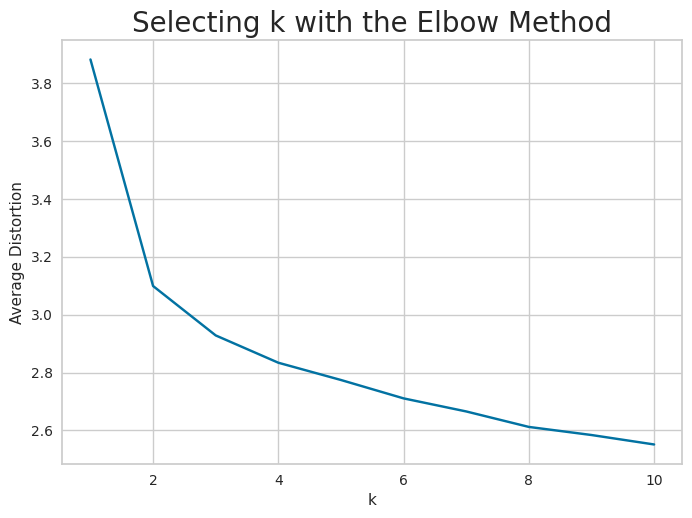

In [43]:
# Perform K-means clustering and elbow method to determine optimal k
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)  # Fit the KMeans model on k_means_df
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, 'euclidean'), axis=1))
        / k_means_df.shape[0]
    )
    meanDistortions.append(distortion)
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# Plot the Elbow curve
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)
plt.show()

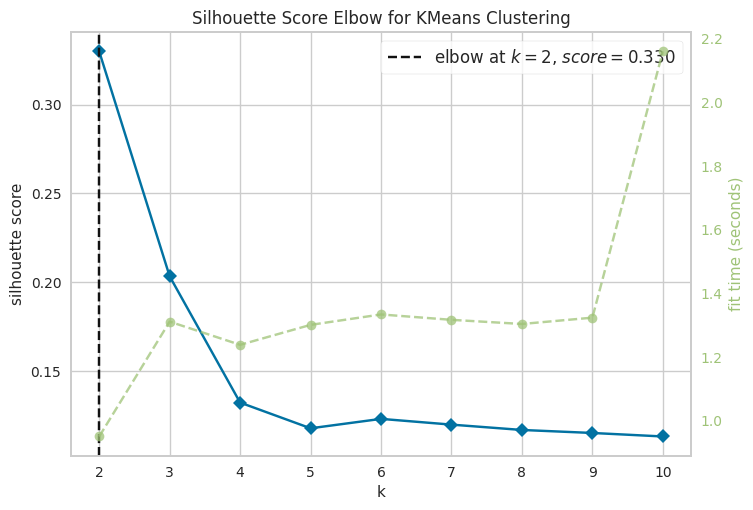

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [44]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* There's a big gap between cluster 4 and 5
* The curve indicates that 5 clusters may be be the best split

For n_clusters = 2, the silhouette score is 0.32991555688962687)
For n_clusters = 3, the silhouette score is 0.20331914923782843)
For n_clusters = 4, the silhouette score is 0.13223566990971497)
For n_clusters = 5, the silhouette score is 0.11776192223318636)
For n_clusters = 6, the silhouette score is 0.12305822742075741)
For n_clusters = 7, the silhouette score is 0.11982204794517166)
For n_clusters = 8, the silhouette score is 0.11681849540050483)
For n_clusters = 9, the silhouette score is 0.11512507975438797)
For n_clusters = 10, the silhouette score is 0.11315374152121696)


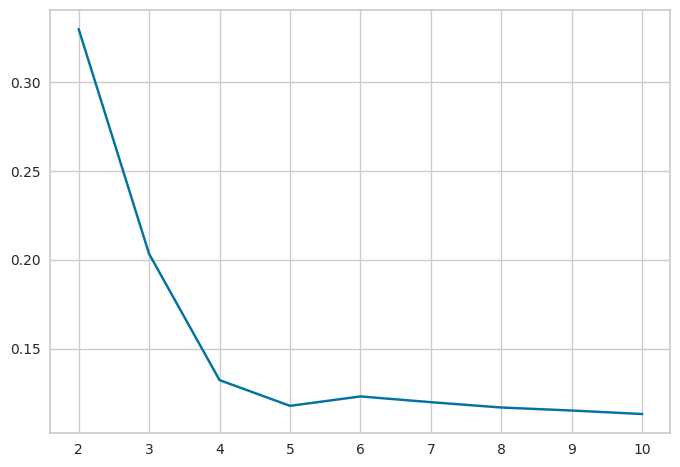

In [45]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

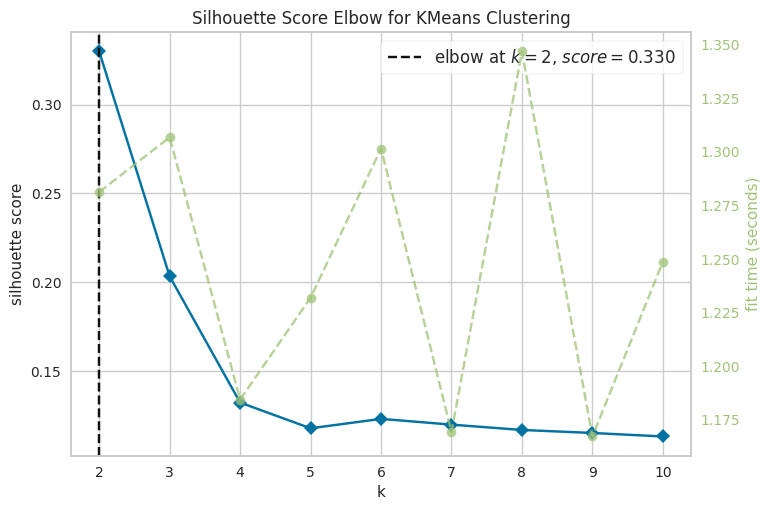

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [46]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* Silhouette score for 4 is a bit higher than that for 5

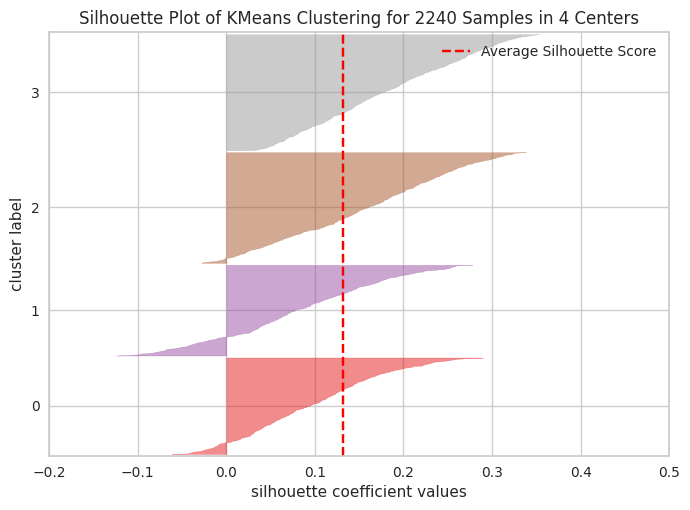

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

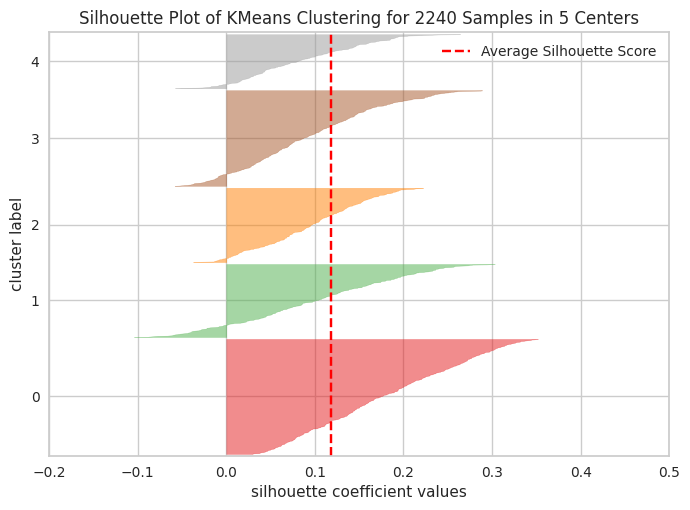

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

* Looks like 2 big clusters with one smaller is the best choise

### Fitting the final model 

In [49]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=0)

In [50]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [51]:
# Select only numeric columns for grouping and calculation of mean
numeric_df1 = df1.select_dtypes(include='number')

# Group by "KM_segments" and calculate the mean for each group
km_cluster_profile = numeric_df1.groupby("KM_segments").mean()

In [52]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Income"].count().values 
)

In [53]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Education_MaritalStatus,TotalChildren,Total_Purchases,Deal_Dependency,Total_Amount_Spent,Days_Since_Customer,Age,count_in_each_segment
KM_segments,,,,,,,,,,,,,,,,,
0,45095.678257,47.904483,91.413255,4.331384,30.003899,5.851852,4.419103,14.884990,5.395712,11.146199,1.461988,9.594542,0.231411,150.904483,3882.132554,59.500975,513
1,75128.320788,50.188333,592.581667,54.200000,391.735000,81.959167,55.410000,68.180833,2.973333,6.428333,0.275000,21.081667,0.066193,1244.066667,4030.096667,55.671667,600
2,29827.457349,49.801262,37.280757,5.600946,25.339117,7.720820,5.485804,16.219243,7.141956,4.353312,1.115142,8.015773,0.261245,97.646688,4075.924290,48.376972,634
3,58980.084096,48.160243,508.423935,20.827586,144.945233,30.156187,20.588235,60.091278,5.659229,8.129817,1.028398,20.799189,0.153143,785.032454,4095.529412,58.687627,493


In [54]:
# Display top ten unique values for each cluster
for cl in df1["KM_segments"].unique():  # Replace 'KM_segments' with the name of the column containing cluster labels
    print("In cluster {}, the following customers are present:".format(cl))
    unique_values = df1[df1["KM_segments"] == cl]["Income"].unique()  # Replace 'Income' with the name of the column containing values of interest
    top_ten_values = unique_values[:40]  # Get the top unique values
    print(top_ten_values)
    print()

In cluster 1, the following customers are present:
[ 58138.          71613.          63033.          82800.
  76995.          84618.          68657.          80011.
  79941.          79143.          82582.          82384.
  70287.          75777.          70666.          88194.
  66991.          65031.          75251.          75825.
  81361.          79593.          51874.49323105  78497.
  85693.          65846.          87195.          52413.
  89058.          77298.          86037.          90765.
 101970.          79607.          73448.          62981.
  92859.          86111.          80317.          66951.        ]

In cluster 0, the following customers are present:
[ 46344.          59354.          46610.          49389.
  42429.          51874.49323105   7500.          55954.
  32474.          28332.          36138.          50388.
  54178.          42394.          23626.          34554.
  49096.          57288.          50785.          32557.
  54348.          41551.         

In [55]:
df1.groupby(["KM_segments", "Recency"])['Income'].count()

KM_segments  Recency
0            0          13
             1           5
             2          10
             3           6
             4           6
                        ..
3            95          4
             96          4
             97          3
             98          6
             99          3
Name: Income, Length: 397, dtype: int64

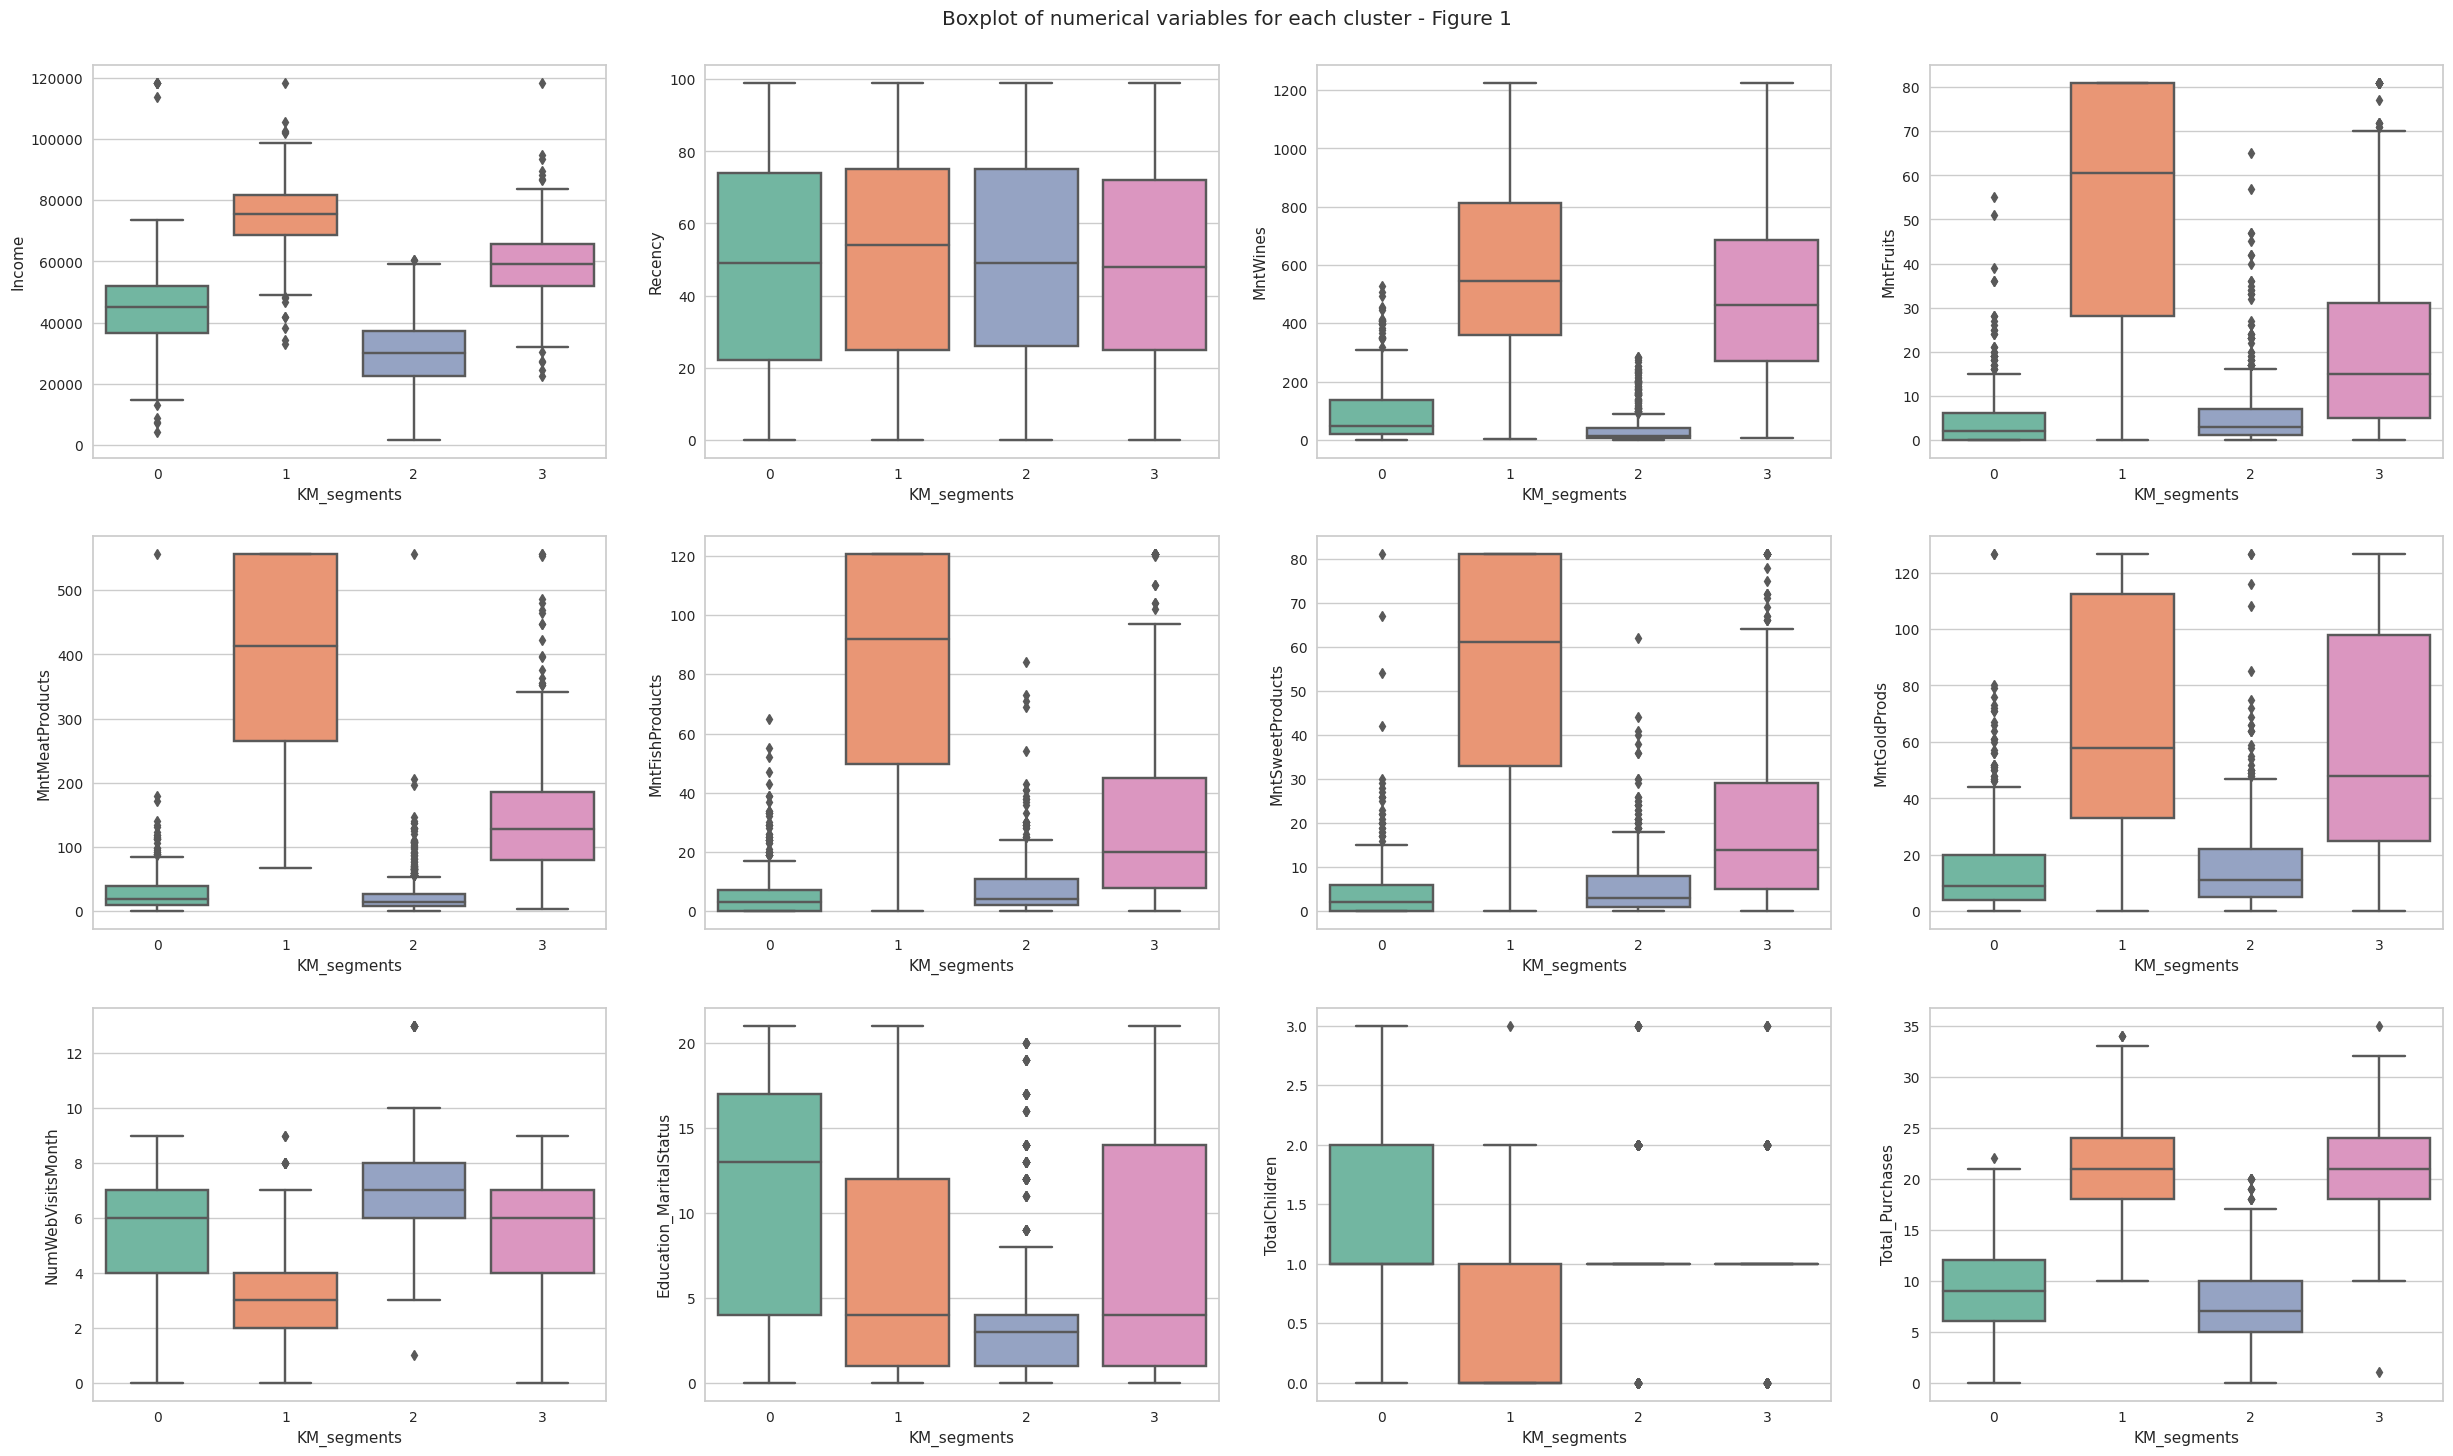

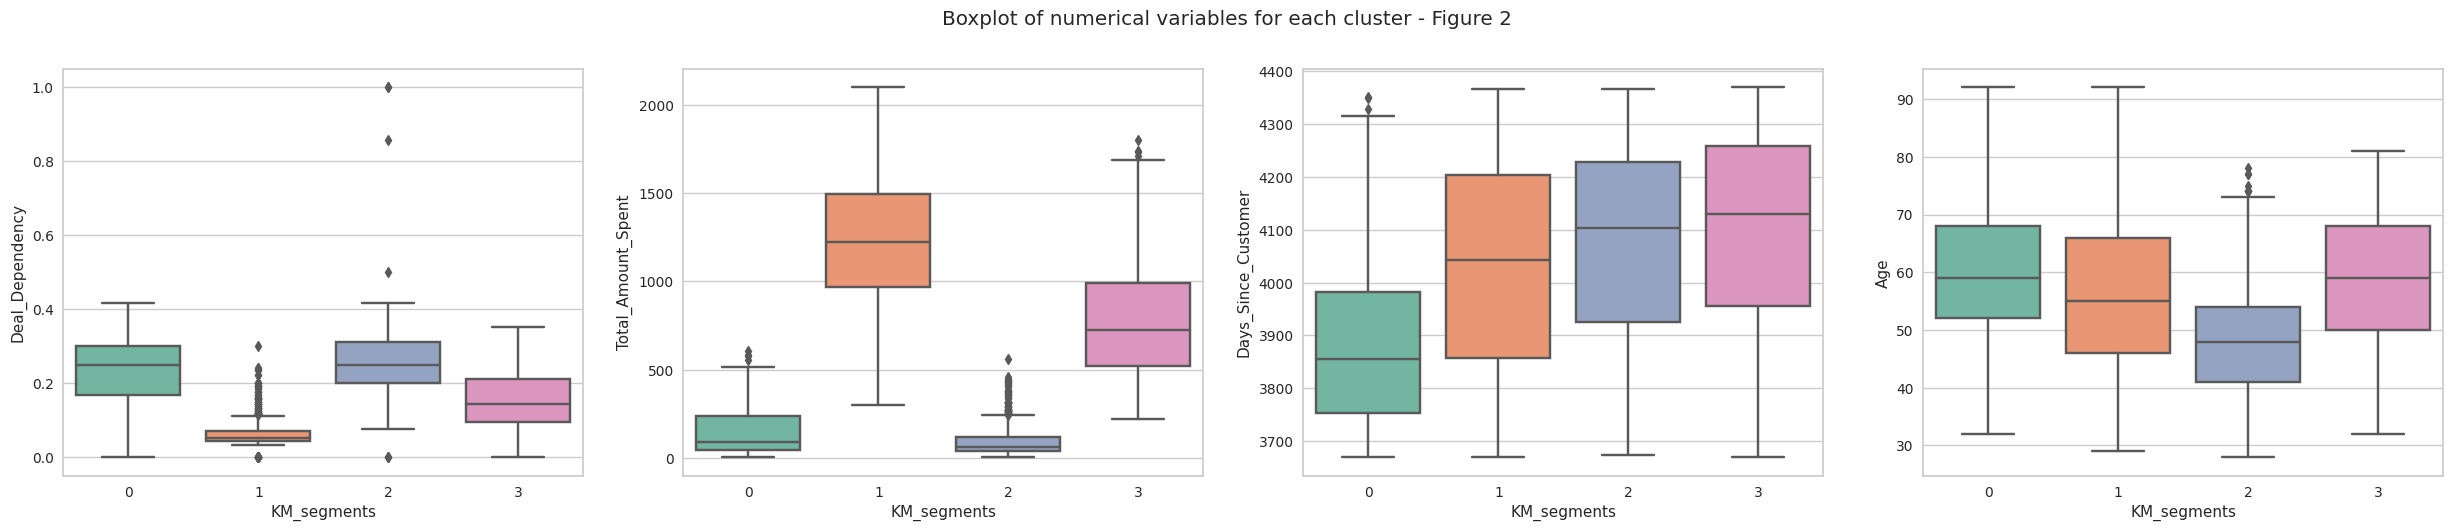

In [56]:
# selecting numerical columns
num_col1 = df.select_dtypes(include=np.number).columns.tolist()

# Define the number of plots per figure
plots_per_fig = 12

# Calculate the number of figures needed
num_figures = (len(num_col1) // plots_per_fig) + 1

for fig_num in range(num_figures):
    plt.figure(figsize=(25, 15))
    plt.suptitle(f"Boxplot of numerical variables for each cluster - Figure {fig_num + 1}")
    
    start_idx = fig_num * plots_per_fig
    end_idx = min(start_idx + plots_per_fig, len(num_col1))
    
    for i, variable in enumerate(num_col1[start_idx:end_idx]):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(data=df1, x="KM_segments", y=variable, palette="Set2")
    
    plt.tight_layout(pad=2.0)
    plt.show()

## Insights

Cluster 0: "Moderate Spenders, Older Families"

* Moderate income
* Higher age
* More children (both kids and teens)
* Moderate spending across categories
* Lower web visits and purchases

Cluster 1: "High-Income, High-Spend Enthusiasts"

* Highest income
* Highest spending across all product categories
* High number of purchases across all channels
* Moderate age
* Fewer children

Cluster 2: "Young, Budget-Conscious Singles"

* Lowest income
* Youngest age group
* Fewest children
* Lowest spending across categories
* Highest number of web visits
* More deal-dependent purchases

Cluster 3: "Middle-Aged, Balanced Shoppers"

* Above-average income
* Middle-aged
* Moderate number of children
* Balanced spending across categories
* Moderate web engagement and purchases

## Recommendations

#### Cluster 0: "Moderate Spenders, Older Families"

* Focus on family-oriented products and promotions
* Develop loyalty programs tailored for long-term customers
*  Improve offline shopping experiences, as they're less likely to use web channels
* Offer bundle deals on diverse product categories to increase overall spend


#### Cluster 1: "High-Income, High-Spend Enthusiasts"

* Create premium, exclusive product lines to maintain their high spending
* Implement VIP programs with personalized services and early access to new products
* Cross-sell and upsell across all product categories
* Engage them in product testing and feedback to foster brand loyalty


#### Cluster 2: "Young, Budget-Conscious Singles"

* Enhance the online shopping experience and mobile app functionality
* Offer more deals and discounts, especially through digital channels
* Create entry-level product lines with good value propositions
* Use social media marketing and influencer partnerships to increase engagement


#### Cluster 3: "Middle-Aged, Balanced Shoppers"

* Provide a seamless omnichannel experience, balancing online and offline offerings
* Create targeted marketing campaigns that appeal to their life stage
* Offer mid-range products with a focus on quality and value
* Implement a flexible loyalty program that rewards consistent, moderate spending



#### General recommendations:

* Personalize marketing efforts based on cluster characteristics
* Optimize product mix and inventory based on cluster preferences
* Develop targeted retention strategies for each cluster
* Regularly analyze cluster evolution to adapt strategies over time